# Data Analysis for Social Sciences: Lab 3

***UNI:*** sk4819 | ***Date:*** October 27, 2021

In [1]:
# Importing libraries
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/shreyanskothari/Desktop/Data Analysis for Social Sciences/Labs/Untitled Folder'

In [3]:
os.chdir("/Users/shreyanskothari/Desktop/Data Analysis for Social Sciences/Labs/Lab1")

In [4]:
gss = pd.read_csv("GSS.2006.csv.xls", sep =",")

In [5]:
print(gss.shape)
gss.head()

(4510, 1261)


,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gss.columns

Index(['vpsu', 'vstrat', 'adults', 'ballot', 'dateintv', 'famgen', 'form',
       'formwt', 'gender1', 'hompop',
       ...
       'away7', 'gender14', 'old14', 'relate14', 'relhh14', 'relhhd14',
       'relsp14', 'where12', 'where6', 'where7'],
      dtype='object', length=1261)

## 1) Run a simple bivariate regression, and interpret your results. (Did the results fit your expectations? Why? Why not?)

***I hope to explore how the respondent's occupational presitge score is associated with their income?***

Text(0.5, 0, 'Occupational Presitge Score')

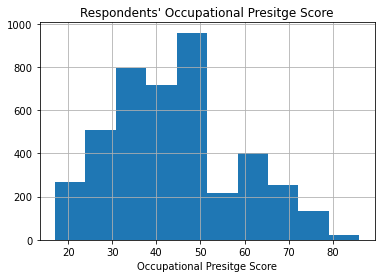

In [7]:
gss.prestg80.hist()
plt.title("Respondents' Occupational Presitge Score")
plt.xlabel("Occupational Presitge Score")

Text(0.5, 0, 'Income in $')

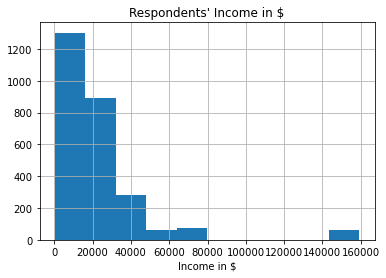

In [8]:
gss.realrinc.hist()
plt.title("Respondents' Income in $")
plt.xlabel("Income in $")

In [9]:
lm1 = smf.ols(formula ='prestg80~realrinc' ,data = gss).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg80   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           3.68e-75
Time:                        22:20:07   Log-Likelihood:                -10655.
No. Observations:                2655   AIC:                         2.131e+04
Df Residuals:                    2653   BIC:                         2.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.3210      0.351    114.824      0.000      39.632      41.010
realrinc       0.0002   9.99e-06     18.943      0.000       0.000       0.000
==============================================================================
Omnibus:                       84.400   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.859
Skew:                           0.335   Prob(JB):                     2.49e-16
Kurtosis:                       2.552   Cond. No.                     4.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There seems to be a positive relationship between the respondent's occupational presitge score and their income in dollars. However, the coefficent of income on presitge is very small; income doesn't have a huge effect on the respondents' occupational presitge.

I expected a positive strong relationship between income and presitge- there seems to be a positive relationship (coefficient of realrinc is positive) but income doesn't have as big of an effect on occupational prestige as I thought it would.  

***Interpretation:*** 
- realrinc: On average, a unit increase in respondent's income is associated with a 0.0002 percentage points increase in the respondent's occupational prestige score. 
- Intercept: A respondent with 0 income will have an occupational presitge score of 40.3210. 


Text(0, 0.5, 'Occupational Prestige Score')

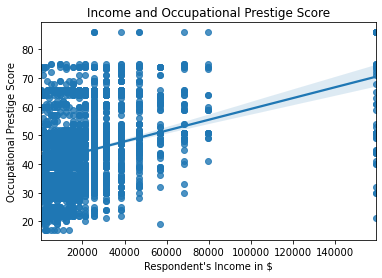

In [10]:
sns.regplot(x = 'realrinc', y = 'prestg80', data = gss)
plt.title("Income and Occupational Prestige Score")
plt.xlabel("Respondent's Income in $")
plt.ylabel("Occupational Prestige Score")

## 2) Add an additional variable that might mediate or partly "explain" the initial association from that simple regression above -- and explain your results.  Did it work out?  Yes?  No? 

Including respondent's number of years of education - educ - in the model

Text(0, 0.5, "Respondents' income in dollars")

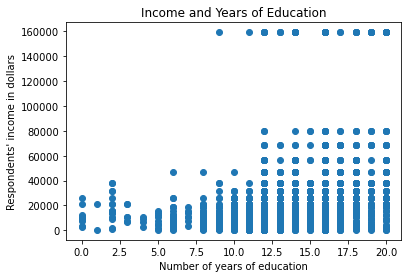

In [19]:
plt.scatter(x = 'educ', y = 'realrinc', data = gss)
plt.title("Income and Years of Education")
plt.xlabel("Number of years of education")
plt.ylabel("Respondents' income in dollars")

I expect including the number of years of education should improve the model's ability to predict the occupational score since most professions with high presitge associated with them tend to demand relatively more years of education, compared to those that are associated with a lower presitge score. 

In [12]:
lm2 = smf.ols(formula ='prestg80~realrinc+educ' ,data = gss).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg80   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     612.0
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          3.53e-219
Time:                        22:20:08   Log-Likelihood:                -10296.
No. Observations:                2649   AIC:                         2.060e+04
Df Residuals:                    2646   BIC:                         2.062e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6343      1.049     12.040      0.000      10.577      14.692
realrinc       0.0001   9.22e-06     12.236      0.000    9.48e-05       0.000
educ           2.1449      0.078     27.643      0.000       1.993       2.297
==============================================================================
Omnibus:                       25.760   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.288
Skew:                           0.243   Prob(JB):                     1.96e-06
Kurtosis:                       3.042   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As expected, number of years of eduction improves the model's ability to predict the occupational presitge score. The R-sq (proportion of variance in the dependence variable explained by the model) has improved from the first model (0.119) to 0.316. This is a huge improvement in the model predictability. The coefficient of education on prestige is also bigger than the coefficient of income on prestige- education has a bigger influence on occupational presitge than does income.  

***Interpretation:*** 
- educ: Holding income constant, on average, an additional year of education is associated with a 2.1449 percentage point increase in the respondent's occupational prestige score. 
- realrinc: Holding number of years of education constant, on average, a unit increase in respondent's income is associated with a 0.0001 percentage points increase in the respondent's occupational prestige score.
- Intercept: A respondent with 0 years of education and 0 income will have an occupational prestige score of 12.6343


Just as I expected, jobs with higher presitge tend to be the ones that require more years of education.

## 3) Run another multiple regression.  Tell me how you expect your dependent variable to be affected by the independent variables.  Interpret your results.

In this regression, I hope to explore the association between the respondent's socioeconomic status and their parents and spouses' socioeconomic status. I expect there to be a strong positive relationship between the respondent's socioeconomic status and that of their family's (parents and spouse). I expect the spousal socioeconomic status to have the strongest effect on the respondent's socioeconomic status.

***How is the respondent's socioeconomic status associated with their family's socioeconomic status ?***

In [13]:
lm3 = smf.ols(formula = "sei~pasei+masei+spsei", data = gss).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sei   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     52.89
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           2.15e-30
Time:                        22:20:08   Log-Likelihood:                -2630.0
No. Observations:                 614   AIC:                             5268.
Df Residuals:                     610   BIC:                             5286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3551      2.546      9.175      0.000      18.356      28.354
pasei          0.1704      0.041      4.192      0.000       0.091       0.250
masei          0.1890      0.041      4.610      0.000       0.108       0.270
spsei          0.2668      0.036      7.410      0.000       0.196       0.338
==============================================================================
Omnibus:                       53.094   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.321
Skew:                           0.116   Prob(JB):                     0.000105
Kurtosis:                       2.186   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model meets my expectations: there is a strong positive realtionship between the respondent's sei and that of their family's. And of all members considered, the spouse's sei has the stronged effect on the respondent's sei.

***Interpretation:***
- pasei: On average, holding all other variables constant, a percentage point increase in the respondent's father's socioeconomic status is associated with a 0.1704 percentage point increase in the respondent's socioeconomic status. 
- masei: On average, holding all other variables constant, a percentage point increase in the respondent's mother's socioeconomic status is associated with a 0.1890 percentage point increase in the respondent's socioeconomic status. 
- spsei: On average, holding all other variables constant, a percentage point increase in the respondent's spouse's socioeconomic status is associated with a 0.2668 percentage point increase in the respondent's socioeconomic status. 
- Intercept: On average, a respondent whose parents and spouse have 0 on the socioeconomic index will have a 23.3551 on the socioeconomic index. 

## 4) Now add another independent variable to that model in Question 3, preferably a set of dummy variables.  Tell me why you added that new set of variables and what effect you expected them to have.  Did they have an effect?  Interpret that new model.

Including unemp: a dummy variable for if respondent was ever unemployed in the past 10 years, where 1 is yes and 2 is no.

I included this variable because I believe it will have a huge effect on respondent's socioeconomic status. I expect unemp to have a bigger influence on respondent's socioeconomic status than does respondent's family's SES; no matter what the family's socioeconomic status, unemployment would directly affect the respondent's ability to earn a living, which would affect their position on the socioeconomic index. 

count    1985.000000
mean        1.676071
std         0.468091
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: unemp, dtype: float64


Text(0.5, 1.0, 'Unemployed for a month at any time during the last ten years')

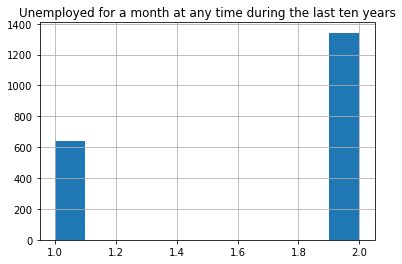

In [14]:
print(gss.unemp.describe())
gss.unemp.hist()
plt.title("Unemployed for a month at any time during the last ten years")

In [15]:
#Recoding the dummy variable for ease in interpretation: 1 = Yes, 0 = No
conditions = [gss['unemp']<=1,
     gss['unemp']>1]
choices = [1, 0]
gss['unemp'] = np.select(conditions, choices, default = np.nan)
gss.unemp.describe()

count    1985.000000
mean        0.323929
std         0.468091
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: unemp, dtype: float64

Text(0.5, 1.0, 'Unemployed for a month at any time during the last ten years')

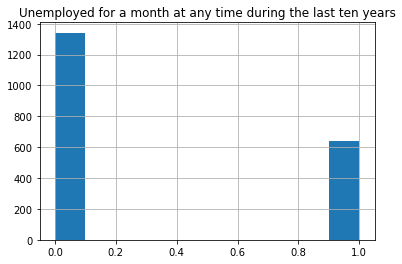

In [16]:
gss.unemp.hist()
plt.title("Unemployed for a month at any time during the last ten years")

In [17]:
lm4 = smf.ols(formula = "sei~pasei+masei+spsei+unemp", data = gss).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sei   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     34.56
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           8.93e-25
Time:                        22:20:09   Log-Likelihood:                -1714.5
No. Observations:                 403   AIC:                             3439.
Df Residuals:                     398   BIC:                             3459.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8924      3.219      6.800      0.000      15.563      28.222
pasei          0.1972      0.049      4.014      0.000       0.101       0.294
masei          0.2412      0.049      4.957      0.000       0.146       0.337
spsei          0.2436      0.043      5.648      0.000       0.159       0.328
unemp         -2.8636      1.961     -1.460      0.145      -6.719       0.992
==============================================================================
Omnibus:                       20.841   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.250
Skew:                           0.110   Prob(JB):                      0.00980
Kurtosis:                       2.291   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Unemp has a huge effect (as expected) on the linear model. The Adj. R-sq increases from 0.203 (model in part 3) to 0.250 due to inclusion of unemp in the model. 


***Interpretation:*** 
- pasei: On average, holding all other variables constant, a percentage point increase in the respondent's father's socioeconomic status is associated with a 0.1972 percentage point increase in the respondent's socioeconomic status. 
- masei: On average, holding all other variables constant, a percentage point increase in the respondent's mother's socioeconomic status is associated with a 0.2412 percentage point increase in the respondent's socioeconomic status. 
- spsei: On average, holding all other variables constant, a percentage point increase in the respondent's spouse's socioeconomic status is associated with a 0.2412 percentage point increase in the respondent's socioeconomic status.
- unemp: On average, holding all other variables constant, a respondent who was unemployed for over a month in the past ten years will have 2.8636 points less on the socioeconomic index than an individual who was never unemployed in the last ten years. 
- Intercept: On average, a respondent who has never been unemployed, whose parents and spouse have 0 on the socioeconomic index will have a 21.8924 on the socioeconomic index. 


## 5) Now run a partial F test comparing the model in Question 3 to the model in Question 4.  Does the F test support the idea of adding those new variables?  Why?  Why not?

Running an F test to evaluate which of the two models (lm3 and lm4) provide a better fit for the data. 

In [18]:
sm.stats.anova_lm(lm3, lm4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,610.0,188908.64675,0.0,NaN,NaN,NaN
1,398.0,116961.93559,212.0,71946.711161,1.154818,0.111878


The F test allows us to evaluate both the models simultaneously and compares them to analyze which one is a better fit for the data. 

***Conclusion:*** The F test does NOT support the idea of including unemp in our model from part 3. With a p-value of 0.111878, we can not conclude that being unemployed anytime for over a month in the past ten years is a good indicator of one's socioeconomic status. Although adding a new variable (unemp) improved the Adj. R. sq of the model, the f test does not support adding this new variable to our lm3 model. 

This is because the p-value for our F statistic (0.111878) is very high compared to our alpha of 0.05. Accordingly, the model from part 3 (lm3 - the base model) is a better fit model for our sample data than the model from part 4 (lm4 - the more complex model). 